In [2]:
import re 
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Read in CSV files
csv_path_1 = Path('Resources/healthcare-dataset-stroke-data.csv')
Health_Care = pd.read_csv(csv_path_1)

csv_path_2 = Path('Resources/Stroke Prediction.csv')
Stroke_Prediction = pd.read_csv(csv_path_2)

csv_path_3 = Path('Resources/stroke_prediction_dataset.csv')
Stroke_Prediction_2 = pd.read_csv(csv_path_3)

# Create a new DataFrame for Health_Care

Health_Care_df = pd.DataFrame(Health_Care)
Health_Care_df.head()

# Combine Stroke DataSets 1 & 2 into a single DataFrame

combined_stroke_data = pd.merge(Stroke_Prediction, Stroke_Prediction_2, how='outer', on='Patient ID')


# Display the Preview of the DataFrame

combined_stroke_data.head()

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [4]:
#https://stackoverflow.com/questions/38557617/how-to-get-all-the-unique-words-in-the-data-frame
stroke = combined_stroke_data[combined_stroke_data["Diagnosis_y"]=="Stroke"]
list(stroke["Symptoms_y"].str.split(', ', expand=True).stack().unique())
countSymptoms = stroke["Symptoms_y"].str.split(',', expand=True).stack().value_counts()

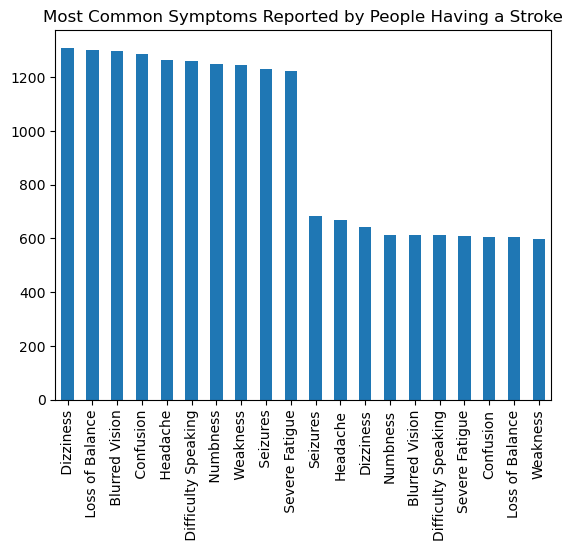

In [5]:
symptomsPlot = countSymptoms.plot(kind="bar", title="Most Common Symptoms Reported by People Having a Stroke")

plt.savefig('symptomsDescription.png', bbox_inches="tight")